In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("medical_examination.csv")
df['height_m'] = df['height']/100
df['BMI'] = (df['weight'] / df['height_m'] **2)
df.drop('height_m',axis=1,inplace=True)
df['overweight'] = df['weight'].apply(lambda x: 1 if x > 25 else 0)
df['cholesterol'] = df['cholesterol'].apply(lambda x:0 if x==1 else 1)
df['gluc'] = df['gluc'].apply(lambda x:0 if x==1 else 1)


In [3]:
def create_catplot():
    df_cat = df.groupby(["cardio", "cholesterol", "gluc", "alco", "smoke", "active","overweight"]).size().rename("total").reset_index().melt(['total', 'cardio'])
    fig = sns.catplot(data=df_cat, x='variable',y='total',col='cardio',kind='bar',hue='value',ci=None,height=4.5,).fig
    fig.savefig("catplot.png")
    return fig

In [4]:
def creare_hetmape():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi'])
        & (df['height'] >= df['height'].quantile(0.025))
        & (df['height'] <= df['height'].quantile(0.975))
        & (df['weight'] >= df['weight'].quantile(0.025))
        & (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig = plt.figure(figsize=(12,6))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask,
                annot=True, fmt='.1f',
             center=0, vmin=-0.5, vmax=0.5)


C:\Users\abdul\AppData\Local\Temp\ipykernel_7408\2349100519.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.catplot(data=df_cat, x='variable',y='total',col='cardio',kind='bar',hue='value',ci=None,height=4.5,).fig


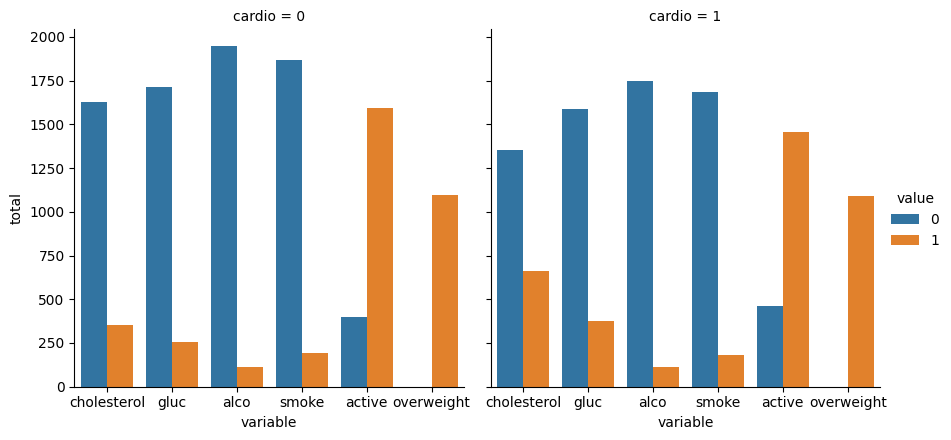

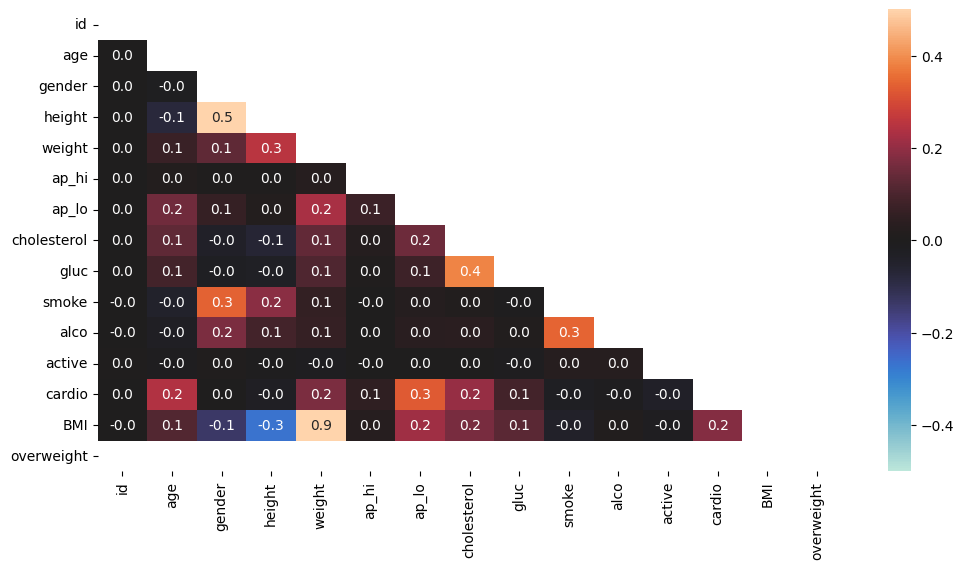

In [5]:
create_catplot()
creare_hetmape()